In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Import Dataset**

In [3]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(['Id'] , axis = 1 , inplace = True)

In [5]:
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data['Species'] = data['Species'].str.replace('Iris-' , '')

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
data['Species'] = data['Species'].str.replace('setosa' , '1')
data['Species'] = data['Species'].str.replace('versicolor' , '2')
data['Species'] = data['Species'].str.replace('virginica' , '3')

In [14]:
data["Species"] = pd.to_numeric(data["Species"], downcast = "integer")


In [15]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


**Heat map**

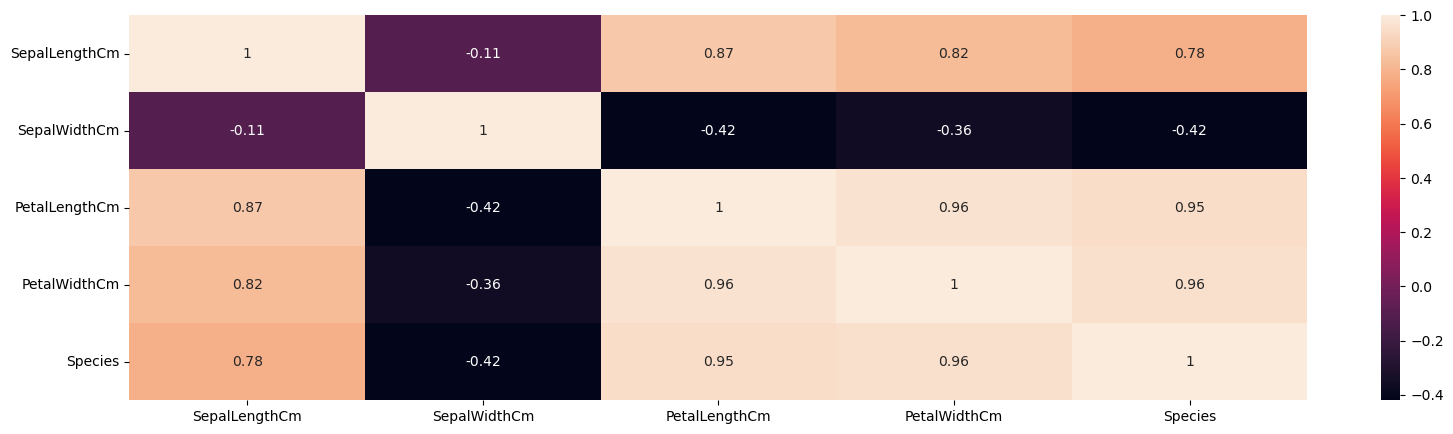

In [16]:
plt.figure(figsize = (19,5))
sns.heatmap(data.corr() , annot = True)
plt.show()

In [17]:
data.drop(['SepalWidthCm'] , axis = 1 , inplace = True)

In [18]:
data.head()


,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,1.4,0.2,1
1,4.9,1.4,0.2,1
2,4.7,1.3,0.2,1
3,4.6,1.5,0.2,1
4,5.0,1.4,0.2,1


**Modelling**

In [19]:
X = data.drop(['Species'] , axis = 1)
y = data['Species']


In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt_model = DecisionTreeClassifier()

In [25]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dt_model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [28]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9736842105263158


In [29]:
from sklearn.model_selection import cross_val_score


In [30]:
cv_scores = cross_val_score(estimator=dt_model, X = X_train, y = y_train, cv=10)
cv_scores.mean()

0.9462121212121213

In [31]:
cv_scores

array([1.        , 0.91666667, 0.81818182, 1.        , 0.90909091,
       1.        , 0.81818182, 1.        , 1.        , 1.        ])

In [32]:
print(confusion_matrix(y_test, y_pred))

[[18  0  0]
 [ 0  7  1]
 [ 0  0 12]]


**Decision Tree**

In [33]:
from sklearn import tree

In [34]:
list(data.columns[:-1])

['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

In [35]:
features = list(data.columns[:-1])
targets = ["setosa", "versicolor", "virginica "]
print(features)
print(targets)


['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']
['setosa', 'versicolor', 'virginica ']


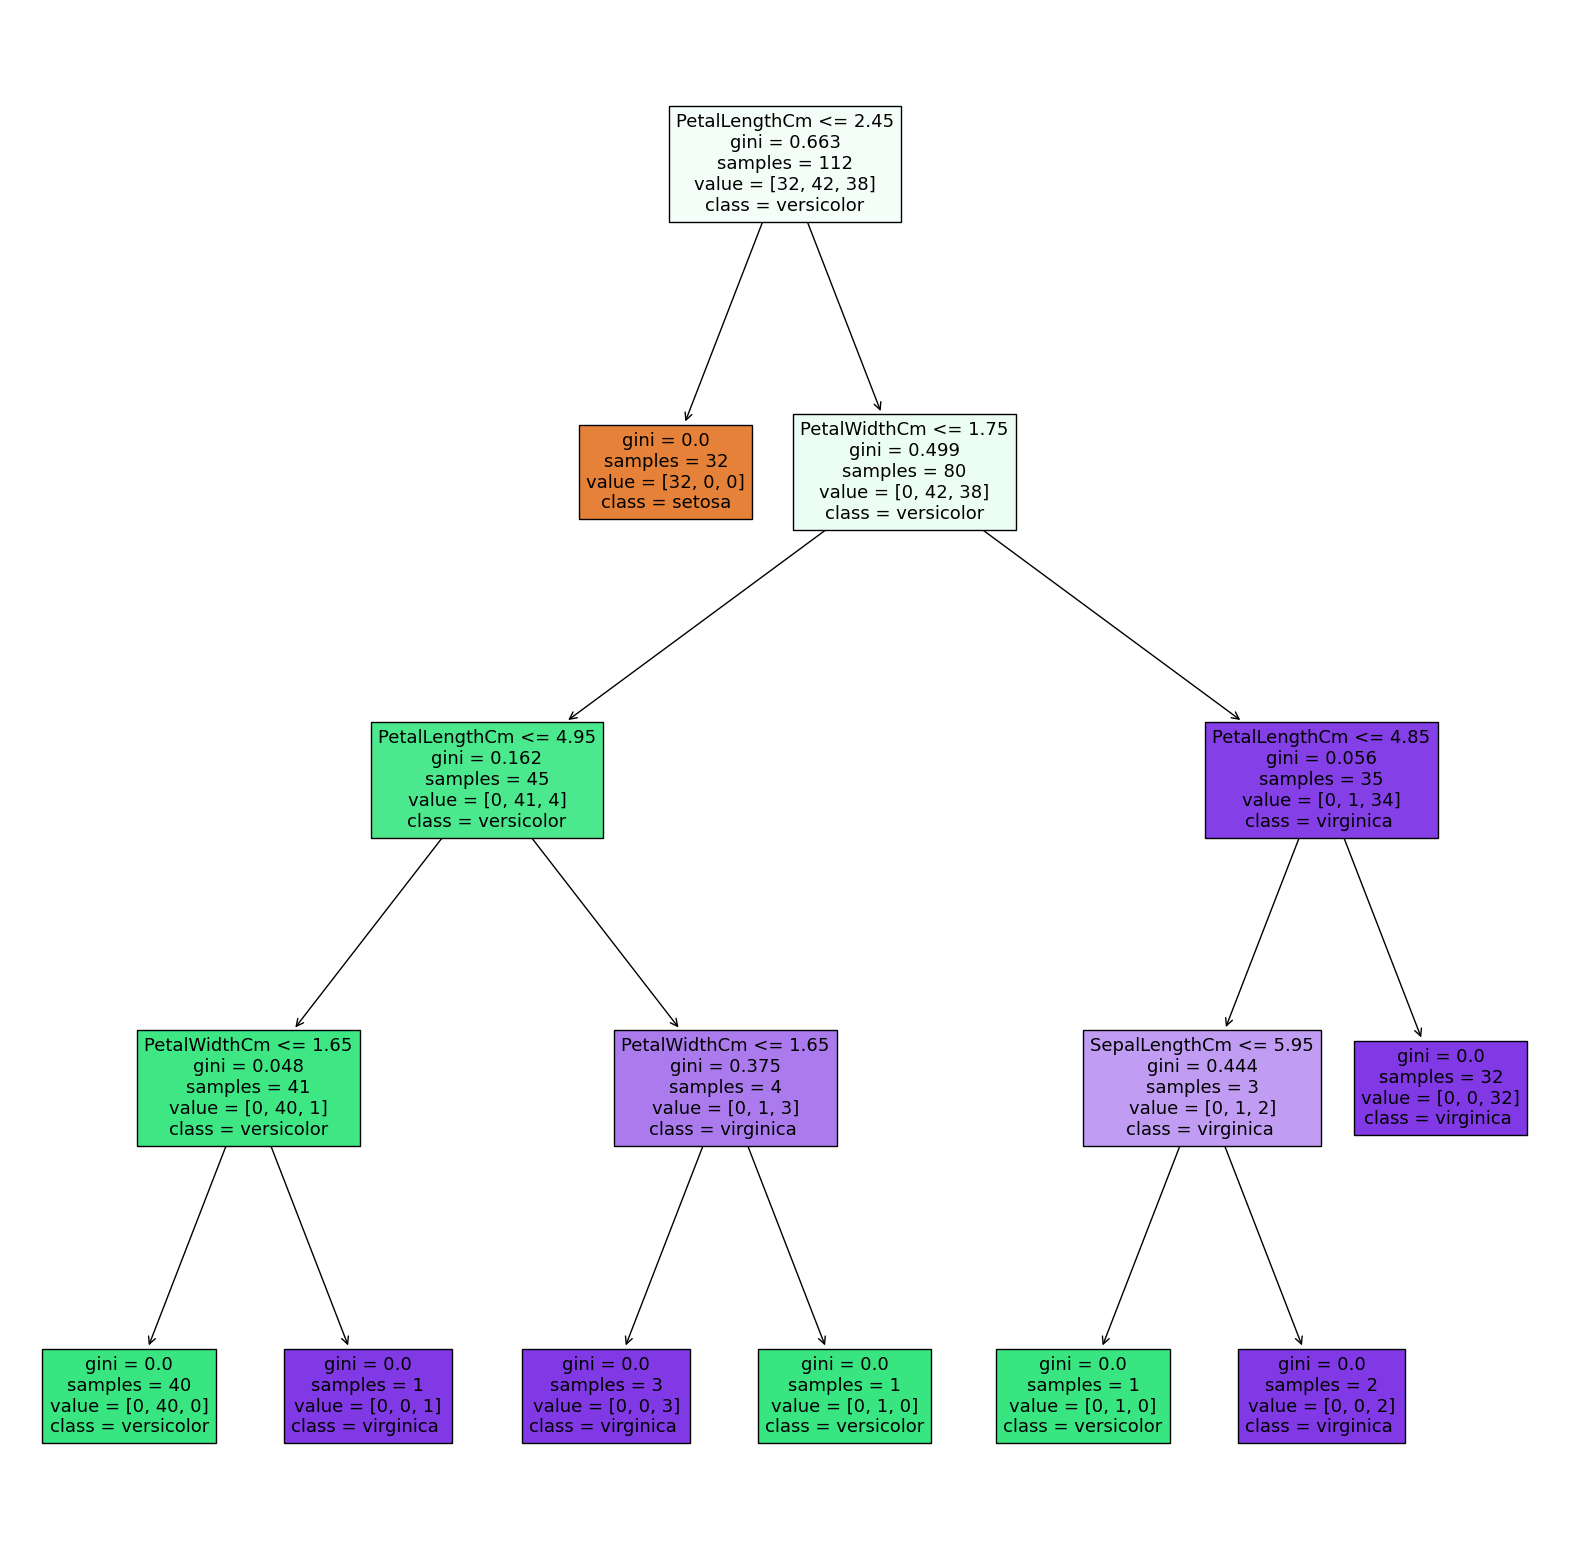

In [38]:
plt.figure(figsize=(20,20)) 
tree2 = tree.plot_tree(dt_model, filled = True , feature_names=features , class_names = targets)